In [ ]:
import pathlib
train_data_path="/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
test_data_path="/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test"
train_data=pathlib.Path(train_data_path).glob("*/*.jpg")
test_data=pathlib.Path(test_data_path).glob("*/*.jpg")

print(len(list(train_data)),len(list(test_data)))

#this is the second round loading as the augmented file is also copied in the same folder 
#to test if the new images will have any impact on the accuracy

5399 118


In [ ]:
batch_size = 32
img_height = 180
img_width = 180
     

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 

In [ ]:
training_data=keras.preprocessing.image_dataset_from_directory(directory=train_data_path,image_size=(img_width,img_width),seed=123)
testing_data=keras.preprocessing.image_dataset_from_directory(directory=test_data_path,image_size=(img_width,img_width),seed=123)

Found 8549 files belonging to 9 classes.
Found 118 files belonging to 9 classes.


In [ ]:
autotune = tf.data.experimental.AUTOTUNE
train_ds=training_data.cache().shuffle(1000).prefetch(buffer_size=autotune)
validation_ds=testing_data.cache().prefetch(buffer_size=autotune)

In [ ]:
class_category=training_data.class_names
class_category

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [ ]:
# Visualizing few images

image for ISIC_0024747.jpg
(450, 600, 3)


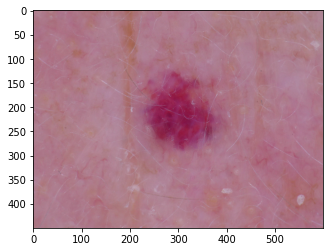

image for ISIC_0025601.jpg
(450, 600, 3)


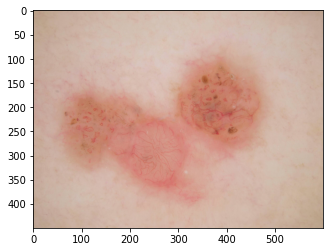

image for ISIC_0000142.jpg
(1536, 2048, 3)


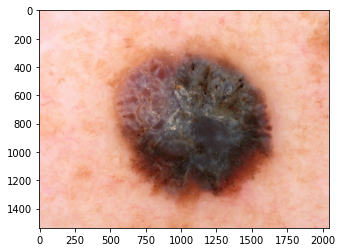

image for ISIC_0010862.jpg
(768, 1024, 3)


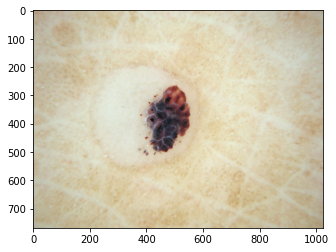

image for ISIC_0000027.jpg
(1129, 1504, 3)


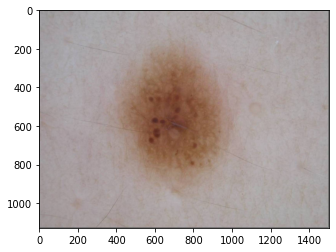

image for ISIC_0027562.jpg
(450, 600, 3)


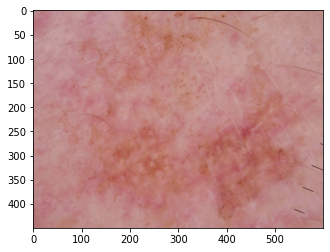

image for ISIC_0026471.jpg
(450, 600, 3)


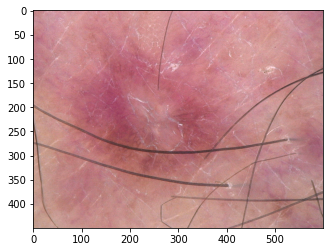

image for ISIC_0024981.jpg
(450, 600, 3)


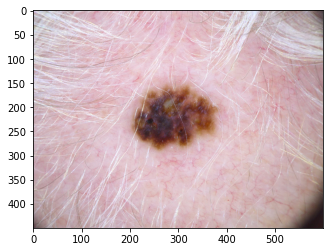

image for ISIC_0026362.jpg
(450, 600, 3)


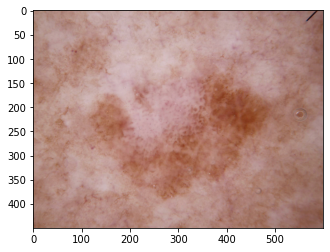

In [ ]:
import os
for p in os.listdir(train_data_path):
  for f in os.listdir(os.path.join(train_data_path,p)):
    print(f"image for {f}")
    img_data=keras.preprocessing.image.load_img(os.path.join(train_data_path,p,f))
    img_array=keras.preprocessing.image.img_to_array(img_data)
    print(img_array.shape)
    plt.imshow(img_array/255)
    plt.show()
    break
  

In [ ]:
img_array.shape

(450, 600, 3)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten


In [ ]:
base_model = Sequential()
base_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(180,180,3)))
base_model.add(MaxPool2D(pool_size=(2,2)))
base_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
base_model.add(MaxPool2D(pool_size=(2,2)))
base_model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
base_model.add(Flatten())
base_model.add(Dense(128,activation='relu'))
base_model.add(Dense(64,activation='relu'))
base_model.add(Dense(9))
base_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 215168)            0

In [ ]:
# base_model.compile(optimizer=keras.optimizers.Adam(),
#                    loss=keras.losses.CategoricalCrossentropy(),
#                    metrics=keras.metrics.Accuracy())
# base_model.summary()

base_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 215168)            0

In [ ]:
print(type(training_data))
print(type(train_ds))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


In [ ]:
print(training_data)
print(train_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
history=base_model.fit(train_ds,validation_data=validation_ds,epochs=20)

Epoch 1/20
268/268 [==============================] - 4922s 3s/step - loss: 9.3823 - accuracy: 0.2215 - val_loss: 2.3359 - val_accuracy: 0.1186
Epoch 2/20
268/268 [==============================] - 727s 3s/step - loss: 2.0097 - accuracy: 0.2603 - val_loss: 2.6660 - val_accuracy: 0.1356
Epoch 3/20
268/268 [==============================] - 736s 3s/step - loss: 1.8161 - accuracy: 0.3443 - val_loss: 2.8056 - val_accuracy: 0.1610
Epoch 4/20
268/268 [==============================] - 726s 3s/step - loss: 1.4286 - accuracy: 0.4887 - val_loss: 3.5540 - val_accuracy: 0.1610
Epoch 5/20
268/268 [==============================] - 723s 3s/step - loss: 1.1045 - accuracy: 0.6258 - val_loss: 3.9284 - val_accuracy: 0.2034
Epoch 6/20
268/268 [==============================] - 725s 3s/step - loss: 0.8588 - accuracy: 0.7228 - val_loss: 5.5891 - val_accuracy: 0.1695
Epoch 7/20
268/268 [==============================] - 724s 3s/step - loss: 0.6125 - accuracy: 0.8140 - val_loss: 6.1007 - val_accuracy: 0.194

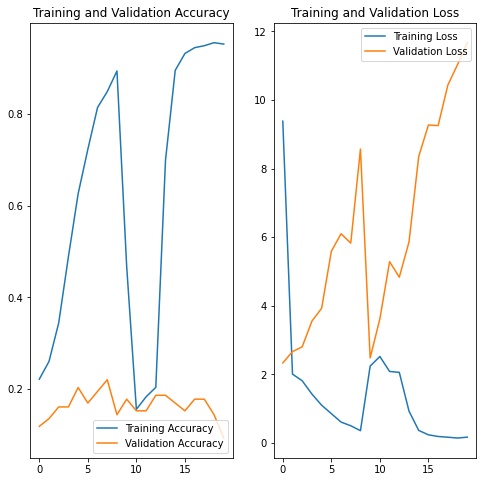

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

With just creating the random number of layerss without any dropout or batch normalization strategy the model seems to be performing not any better than doing the random guess however.

The model seems to be kind of being ovverfitting when we see the graph of the training subset but for the validation subset its not showing the overfitting . rather the model is underfitted in case of the validation subset.

Lets now try to perfom some augmentation steps and retrain the same model to see if this model will perform any better


In [ ]:
#lets do the augmentation and train the model again
augmentated_images=keras.Sequential()
augmentated_images.add(keras.layers.experimental.preprocessing.Resizing(500,500,input_shape=(img_width,img_height,3)))
augmentated_images.add(keras.layers.experimental.preprocessing.CenterCrop(250,250))
augmentated_images.add(keras.layers.experimental.preprocessing.RandomRotation((-0.2,0.3)))
augmentated_images.add(keras.layers.experimental.preprocessing.RandomFlip())


In [ ]:
# augmentated_images.compile(optimizer=keras.optimizers.Adam(),
#                    loss=keras.losses.CategoricalCrossentropy(),
#                    metrics=keras.metrics.Accuracy())
augmentated_images.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
augmentated_images.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 500, 500, 3)       0         
                                                                 
 center_crop (CenterCrop)    (None, 250, 250, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 250, 250, 3)      0         
 tion)                                                           
                                                                 
 random_flip (RandomFlip)    (None, 250, 250, 3)       0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Lets now try to visualize few augmented images using the different layers and see if the augmentation being done is in correct manner

image for [4 3 5 7 5 1 3 7 1 2 5 3 2 8 0 6 6 4 7 5 2 0 3 7 0 2 1 3 1 3 3 3]
(32, 180, 180, 3)
(180, 180, 3)


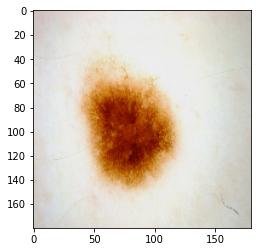

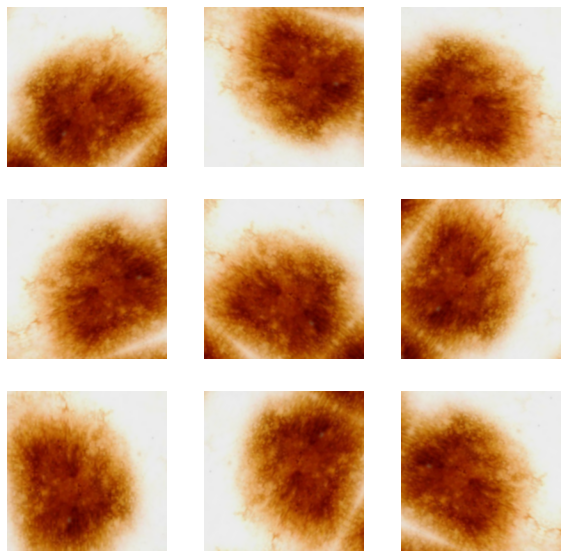

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for v,l in train_ds:
    print(f"image for {l}")
    print(v.shape)
    print(v[0].shape)
    plt.imshow(v[0]/255)
    plt.show()
    plt.figure(figsize=(10, 10))
#     for images, _ in train_ds.take(1):
    if True:
      for i in range(9):
        augmented_images = augmentated_images(v)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")
        
    break

In [ ]:
base_model_n_augment=Sequential()
base_model_n_augment.add(augmentated_images)
base_model_n_augment.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
base_model_n_augment.add(MaxPool2D(pool_size=(2,2)))
base_model_n_augment.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
base_model_n_augment.add(MaxPool2D(pool_size=(2,2)))
base_model_n_augment.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
base_model_n_augment.add(Flatten())
base_model_n_augment.add(Dense(128,activation='relu'))
base_model_n_augment.add(Dense(64,activation='relu'))
base_model_n_augment.add(Dense(9))

In [ ]:
# base_model_n_augment.compile(optimizer=keras.optimizers.Adam(),
#                    loss=keras.losses.CategoricalCrossentropy(),
#                    metrics=keras.metrics.Accuracy())
# base_model_n_augment.summary()


base_model_n_augment.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
base_model_n_augment.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 250, 250, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 248, 248, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 124, 124, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 59, 59, 64)       

In [ ]:
history1=base_model_n_augment.fit(train_ds,validation_data=validation_ds,epochs=20)


Epoch 1/20


268/268 [==============================] - 787s 3s/step - loss: 15.9376 - accuracy: 0.1739 - val_loss: 2.2097 - val_accuracy: 0.1271
Epoch 2/20
268/268 [==============================] - 775s 3s/step - loss: 2.0688 - accuracy: 0.2014 - val_loss: 2.2316 - val_accuracy: 0.2458
Epoch 3/20
268/268 [==============================] - 775s 3s/step - loss: 1.9887 - accuracy: 0.2303 - val_loss: 2.0861 - val_accuracy: 0.2288
Epoch 4/20
268/268 [==============================] - 784s 3s/step - loss: 1.9009 - accuracy: 0.2385 - val_loss: 2.4162 - val_accuracy: 0.2627
Epoch 5/20
268/268 [==============================] - 775s 3s/step - loss: 2.1366 - accuracy: 0.1796 - val_loss: 2.2361 - val_accuracy: 0.1525
Epoch 6/20
268/268 [==============================] - 778s 3s/step - loss: 2.2024 - accuracy: 0.1577 - val_loss: 2.2332 - val_accuracy: 0.1356
Epoch 7/20
268/268 [==============================] - 774s 3s/step - loss: 2.1393 - accuracy: 0.1655 - val_loss: 2.2621 - val_accuracy: 0.1695
Epoch 8/2

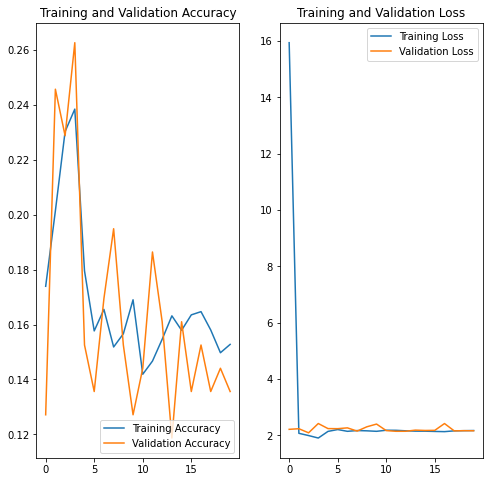

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

After doing the training over the augmented images the problem of the overfitting seems to have resolved but the model is still having less accuracy for prediccting the things 

Lets try  now another strategy  by increating the number of images 
since we dont have any extra images we will try to generate few images from the existing iimages using the library known as augmentator and try to retrain our model

In [ ]:
#Before that lets visualize how many images are there in each category and try  to visualize the distribution

In [ ]:
import os
result=[]
for p in os.listdir(train_data_path):
  # for f in os.listdir(os.path.join(train_data_path,p)):
    result.append((p,len(os.listdir(os.path.join(train_data_path,p)))))
print(result)

[('vascular lesion', 139), ('basal cell carcinoma', 376), ('melanoma', 438), ('seborrheic keratosis', 77), ('nevus', 367), ('actinic keratosis', 114), ('dermatofibroma', 95), ('pigmented benign keratosis', 462), ('squamous cell carcinoma', 181)]


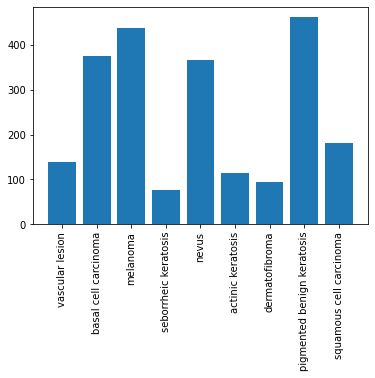

In [ ]:
plt.bar([i[0] for i in result],[i[1] for i in result])
plt.xticks(rotation=90)
plt.show()


In [ ]:
# it can be clearly seen that few category has the large image count while other dont have the enough images lets now 
# try to use the augmentor library  and generate feww images

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import Augmentor

for i in class_category:
    pipeline= Augmentor.Pipeline(train_data_path +"/"+ i)
    pipeline.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    pipeline.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
    pipeline.sample(350)

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4BCD13F790>: 100%|██████████| 350/350 [00:18<00:00, 18.44 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4BCD106730>: 100%|██████████| 350/350 [00:19<00:00, 17.89 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4BCD1A1B20>: 100%|██████████| 350/350 [00:21<00:00, 16.12 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F4BCD182F40>: 100%|██████████| 350/350 [01:46<00:00,  3.30 Samples/s]


Initialised with 367 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2725x2082 at 0x7F4BCD215C10>: 100%|██████████| 350/350 [01:30<00:00,  3.86 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4BCD183C70>: 100%|██████████| 350/350 [00:21<00:00, 16.25 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F4BCD0F3160>: 100%|██████████| 350/350 [00:44<00:00,  7.80 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4BEBC45760>: 100%|██████████| 350/350 [00:19<00:00, 18.21 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4BDD843910>: 100%|██████████| 350/350 [00:21<00:00, 16.65 Samples/s]


In [ ]:
#After generating images it looks like all the images are dumped into the respective folder inside output folder 
# lets check if the images are available which were generated i.e 350 images

In [ ]:
result=[]
for p in os.listdir(train_data_path):
  # for f in os.listdir(os.path.join(train_data_path,p)):
    result.append((p,len(os.listdir(os.path.join(train_data_path,p,'output')))))
print(result)
#now all the images are dumped

[('vascular lesion', 350), ('basal cell carcinoma', 350), ('melanoma', 350), ('seborrheic keratosis', 350), ('nevus', 350), ('actinic keratosis', 350), ('dermatofibroma', 350), ('pigmented benign keratosis', 350), ('squamous cell carcinoma', 350)]


In [ ]:
import shutil
for p in os.listdir(train_data_path):
  for j in os.listdir(os.path.join(train_data_path,p,'output')):
    try:
      shutil.copy(os.path.join(train_data_path,p,'output',j), os.path.join(train_data_path,p,j))
    except Exception as ex:
      print(f"{ex}")

In [ ]:
#Now we will try  to copy all the images from the output folder to the main training directory so that 
# it will be easier to keep track of all the images and we will see the total count of imagess inside after the 
# new images were moved

In [ ]:
result=[]
for p in os.listdir(train_data_path):
  # for f in os.listdir(os.path.join(train_data_path,p)):
    result.append((p,len(os.listdir(os.path.join(train_data_path,p)))))
print(result)
#now all the images are dumped

[('vascular lesion', 490), ('basal cell carcinoma', 727), ('melanoma', 789), ('seborrheic keratosis', 428), ('nevus', 718), ('actinic keratosis', 465), ('dermatofibroma', 446), ('pigmented benign keratosis', 813), ('squamous cell carcinoma', 532)]


In [ ]:
training_data=keras.preprocessing.image_dataset_from_directory(directory=train_data_path,image_size=(img_width,img_width),seed=123)
testing_data=keras.preprocessing.image_dataset_from_directory(directory=test_data_path,image_size=(img_width,img_width),seed=123)

Found 8549 files belonging to 9 classes.
Found 118 files belonging to 9 classes.


In [ ]:
autotune = tf.data.experimental.AUTOTUNE
train_ds=training_data.cache().shuffle(1000).prefetch(buffer_size=autotune)
validation_ds=testing_data.cache().prefetch(buffer_size=autotune)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,BatchNormalization

In [ ]:
base_model_n_augment2=Sequential()
# base_model_n_augment2.add(augmentated_images)
base_model_n_augment2.add(Conv2D(filters=100,kernel_size=(3,3),activation='relu',input_shape=(180,180,3))) #filter as power of 2,
base_model_n_augment2.add(MaxPool2D(pool_size=(2,2)))
base_model_n_augment2.add(Conv2D(filters=80,kernel_size=(3,3),activation='relu'))
base_model_n_augment2.add(MaxPool2D(pool_size=(2,2)))
base_model_n_augment2.add(Conv2D(filters=70,kernel_size=(3,3),activation='relu'))
base_model_n_augment2.add(Flatten())
base_model_n_augment2.add(Dense(50,activation='relu'))
base_model_n_augment2.add(Dense(50,activation='relu'))
base_model_n_augment2.add(Dense(9))


In [ ]:
base_model_n_augment2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

base_model_n_augment2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 80)        72080     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 80)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 70)        50470     
                                                                 
 flatten (Flatten)           (None, 117670)            0

In [ ]:
history3=base_model_n_augment2.fit(train_ds,validation_data=validation_ds,epochs=20)

Epoch 1/20
268/268 [==============================] - 1085s 148ms/step - loss: 6.4566 - accuracy: 0.1656 - val_loss: 2.2744 - val_accuracy: 0.1610
Epoch 2/20
268/268 [==============================] - 17s 62ms/step - loss: 2.1581 - accuracy: 0.1591 - val_loss: 2.4916 - val_accuracy: 0.1441
Epoch 3/20
268/268 [==============================] - 17s 63ms/step - loss: 2.1413 - accuracy: 0.1655 - val_loss: 2.8629 - val_accuracy: 0.1271
Epoch 4/20
268/268 [==============================] - 17s 62ms/step - loss: 2.0812 - accuracy: 0.1932 - val_loss: 3.1083 - val_accuracy: 0.1441
Epoch 5/20
268/268 [==============================] - 17s 62ms/step - loss: 1.9964 - accuracy: 0.2310 - val_loss: 3.5212 - val_accuracy: 0.1356
Epoch 6/20
268/268 [==============================] - 17s 63ms/step - loss: 1.9028 - accuracy: 0.2776 - val_loss: 4.6117 - val_accuracy: 0.1186
Epoch 7/20
268/268 [==============================] - 17s 63ms/step - loss: 1.7842 - accuracy: 0.3271 - val_loss: 6.5185 - val_accura

In [ ]:
#tried with some random filter and kernel size along with the auugmented images to see if it helps but it doessnot 
# looks much worthy

In [ ]:
base_model_n_augment3=Sequential()
# base_model_n_augment2.add(augmentated_images)
base_model_n_augment3.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(180,180,3))) #filter as power of 2,
base_model_n_augment3.add(MaxPool2D(pool_size=(2,2)))
base_model_n_augment3.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
base_model_n_augment3.add(MaxPool2D(pool_size=(2,2)))
base_model_n_augment3.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
base_model_n_augment3.add(MaxPool2D(pool_size=(2,2)))
base_model_n_augment3.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
base_model_n_augment3.add(Flatten())
base_model_n_augment3.add(Dense(128,activation='relu'))
base_model_n_augment3.add(BatchNormalization())
base_model_n_augment3.add(Dropout(0.3))
base_model_n_augment3.add(Dense(128,activation='relu'))
base_model_n_augment3.add(Dropout(0.2))
base_model_n_augment3.add(Dense(9))

In [ ]:
base_model_n_augment3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

base_model_n_augment3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 64)       0

In [ ]:
history4=base_model_n_augment3.fit(train_ds,validation_data=validation_ds,epochs=20)

Epoch 1/20
268/268 [==============================] - 1095s 113ms/step - loss: 1.7809 - accuracy: 0.3231 - val_loss: 2.8885 - val_accuracy: 0.1610
Epoch 2/20
268/268 [==============================] - 6s 22ms/step - loss: 1.5350 - accuracy: 0.4079 - val_loss: 2.7697 - val_accuracy: 0.2288
Epoch 3/20
268/268 [==============================] - 6s 21ms/step - loss: 1.4502 - accuracy: 0.4382 - val_loss: 2.6154 - val_accuracy: 0.2712
Epoch 4/20
268/268 [==============================] - 6s 22ms/step - loss: 1.4761 - accuracy: 0.4294 - val_loss: 2.8796 - val_accuracy: 0.2797
Epoch 5/20
268/268 [==============================] - 6s 21ms/step - loss: 1.4131 - accuracy: 0.4536 - val_loss: 2.1382 - val_accuracy: 0.2797
Epoch 6/20
268/268 [==============================] - 6s 22ms/step - loss: 1.3507 - accuracy: 0.4829 - val_loss: 3.0474 - val_accuracy: 0.2966
Epoch 7/20
268/268 [==============================] - 6s 21ms/step - loss: 1.3198 - accuracy: 0.4856 - val_loss: 1.9487 - val_accuracy: 0.

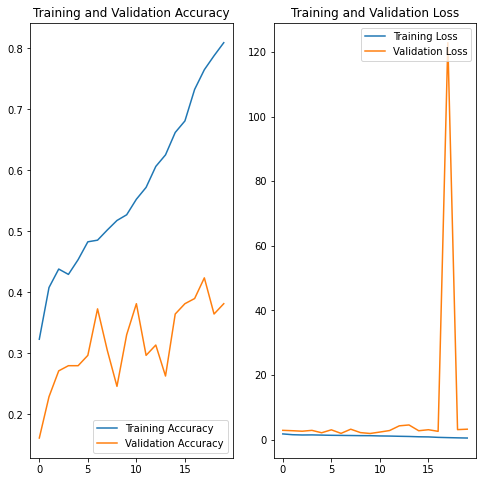

In [ ]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
history5=base_model_n_augment3.fit(train_ds,validation_data=validation_ds,epochs=100)

Epoch 1/100
268/268 [==============================] - 6s 22ms/step - loss: 0.4178 - accuracy: 0.8503 - val_loss: 4.0011 - val_accuracy: 0.3559
Epoch 2/100
268/268 [==============================] - 6s 22ms/step - loss: 0.3555 - accuracy: 0.8678 - val_loss: 7.8462 - val_accuracy: 0.3983
Epoch 3/100
268/268 [==============================] - 6s 22ms/step - loss: 0.3205 - accuracy: 0.8799 - val_loss: 3.9786 - val_accuracy: 0.3390
Epoch 4/100
268/268 [==============================] - 6s 21ms/step - loss: 0.2724 - accuracy: 0.9006 - val_loss: 4.6185 - val_accuracy: 0.3390
Epoch 5/100
268/268 [==============================] - 6s 22ms/step - loss: 0.2453 - accuracy: 0.9111 - val_loss: 4.7233 - val_accuracy: 0.2797
Epoch 6/100
268/268 [==============================] - 6s 21ms/step - loss: 0.2385 - accuracy: 0.9140 - val_loss: 5.1354 - val_accuracy: 0.3559
Epoch 7/100
268/268 [==============================] - 6s 21ms/step - loss: 0.2106 - accuracy: 0.9260 - val_loss: 6.6518 - val_accuracy:

In [ ]:
# after training the model it seemss the performance of the model has improved abit but the the model is still overfitting even afterr we applied the different
# batch normaliization and drop out strategy